In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, hamming_loss, precision_score, recall_score, f1_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import hamming_loss as hl

In [2]:
df = pd.read_csv('finalmovie.csv')
df.head()

,title,new_genre,corpus,genre_length,action,adventure,animation,biography,comedy,crime,...,horror,music,musical,mystery,romance,sci-fi,sport,thriller,war,western
0,Avatar: The Way of Water,"Action,Adventure,Fantasy",jake sulli life newfound famili form extrasola...,3,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,The Menu,"Horror,Thriller",young coupl travel remot island eat exclus res...,2,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,Babylon,"Comedy,Drama,History",tale outsiz ambit outrag excess trace rise fal...,3,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Everything Everywhere All at Once,"Action,Adventure,Comedy",middleag chines immigr swept insan adventur al...,3,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,M3gan,"Horror,Sci-Fi,Thriller",robot engin toy compani build lifelik doll beg...,3,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['corpus'])
print(X.shape)

(76607, 34659)


In [4]:
y = df[['title', 'new_genre', 'corpus', 'genre_length', 'action', 'adventure',
       'animation', 'biography', 'comedy', 'crime', 'drama', 'family',
       'fantasy', 'film-noir', 'history', 'horror', 'music', 'musical',
       'mystery', 'romance', 'sci-fi', 'sport', 'thriller', 'war', 'western']]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['corpus'], df['new_genre'], test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
print('Training set shape:', X_train.shape)
print('Testing set shape:', X_test.shape)

Training set shape: (61285,)
Testing set shape: (15322,)


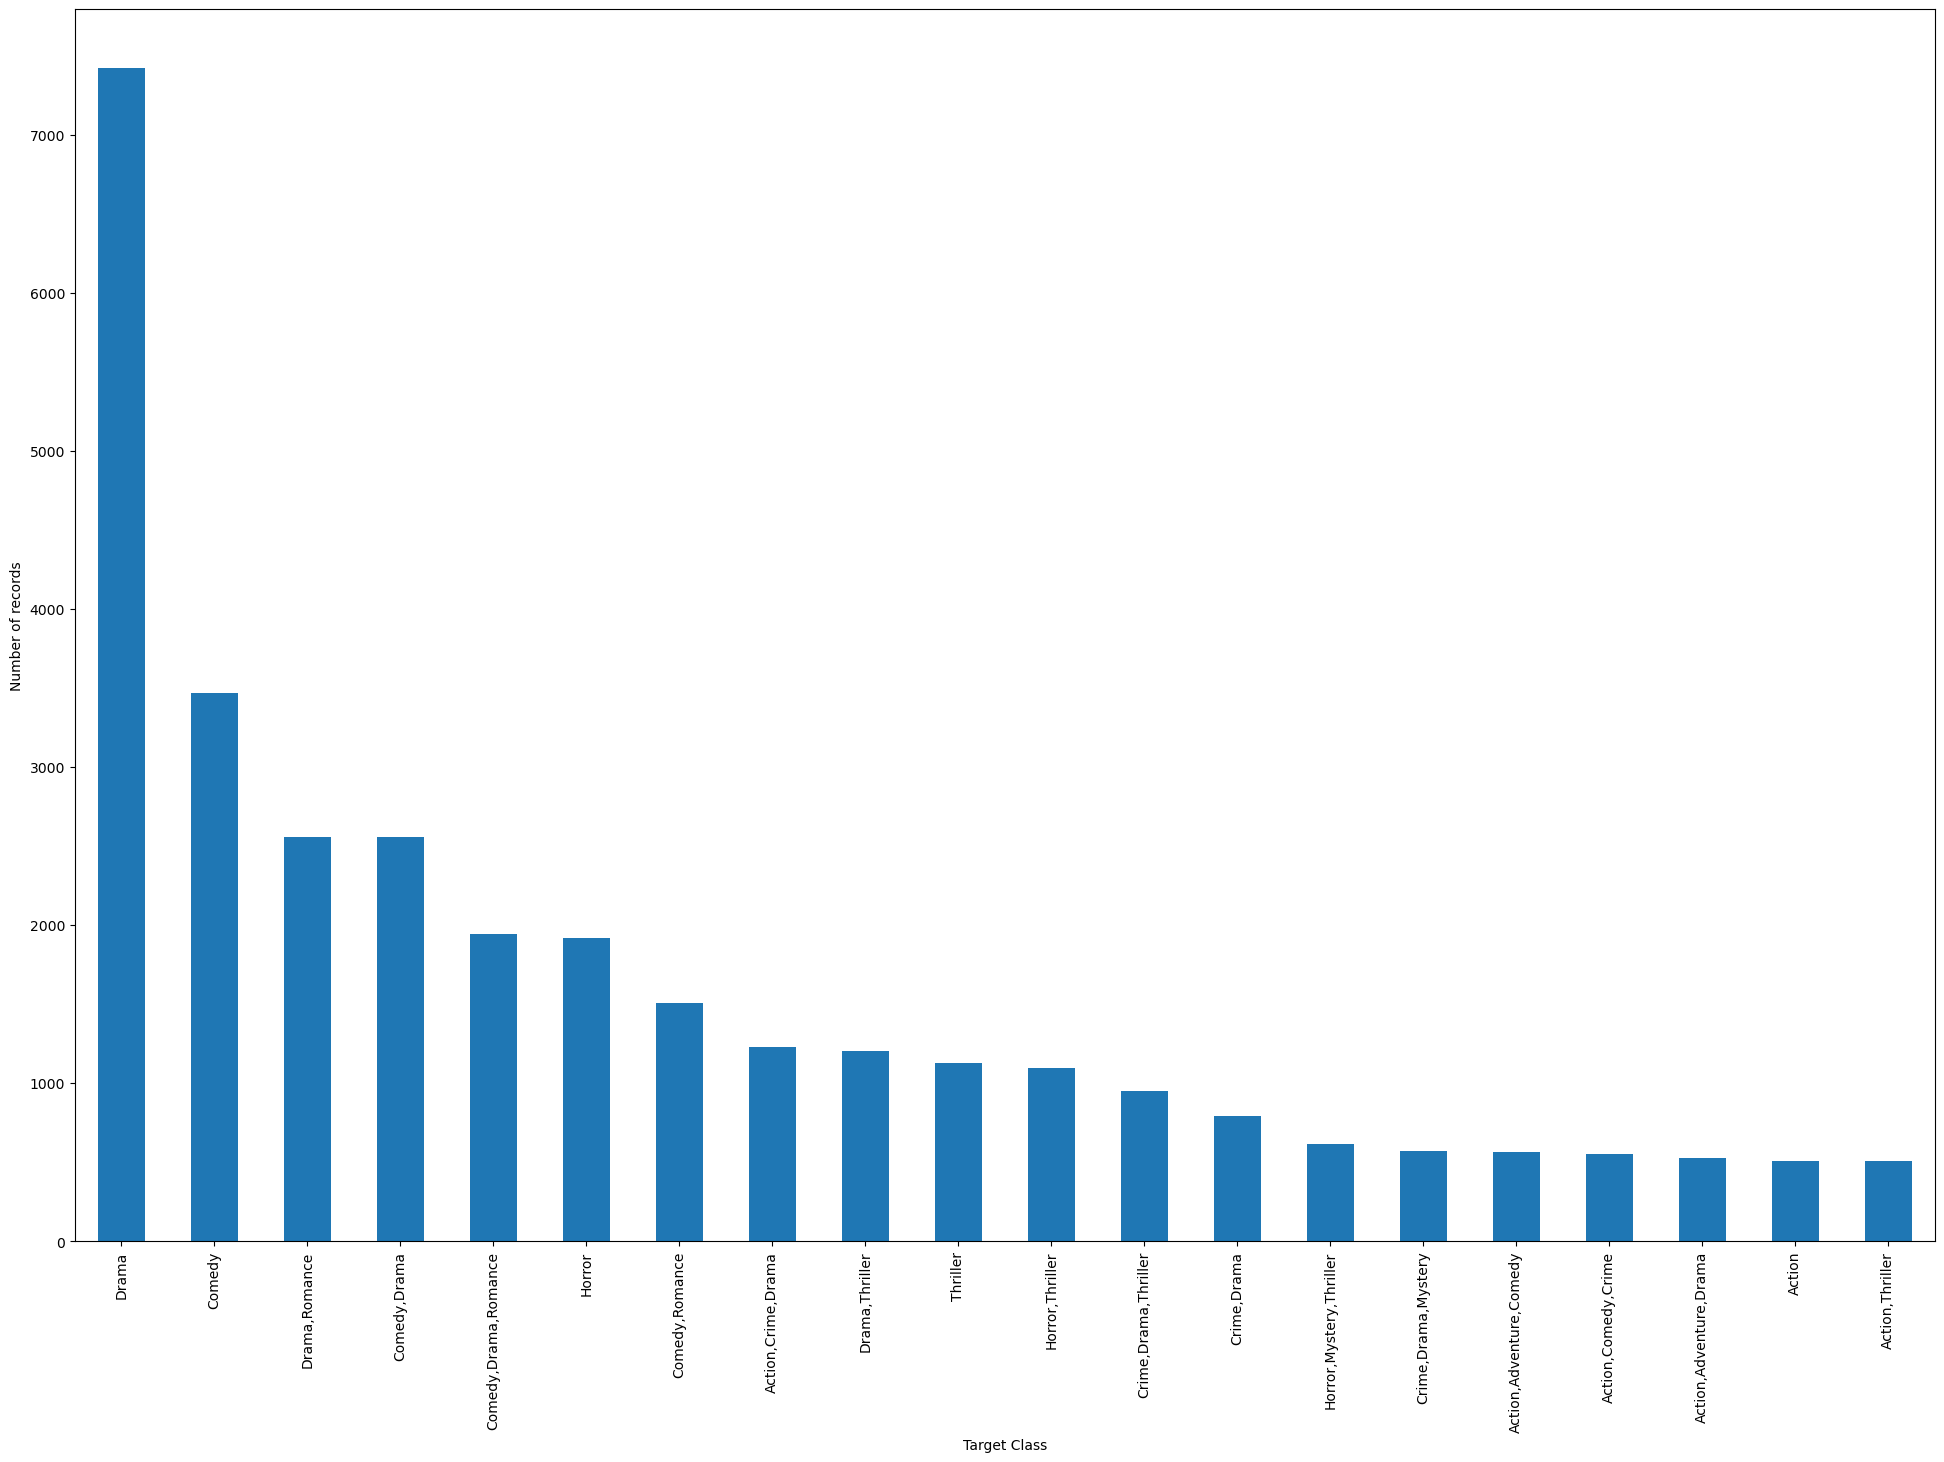

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(24, 16))

count = y_train.value_counts().head(20)  # Get top 20 values
count.plot.bar(ax=ax)
ax.set_ylabel('Number of records')
ax.set_xlabel('Target Class')
# plt.savefig('Images/Imbalance_data.png', bbox_inches='tight')
plt.show()

## Training model

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import scikitplot as skplt

X = df['corpus']
y = df['new_genre']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, hamming_loss, precision_score, recall_score, f1_score

tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 4), max_df=0.8, min_df=5)

# Fit and transform the training data
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf.transform(X_test)


model = DecisionTreeClassifier()
model.fit(X_train_tfidf, y_train)

# Make predictions on test set
y_pred = model.predict(X_test_tfidf)

print("Accuracy: {:.3f}".format(accuracy_score(y_test, y_pred)))
print("Hamming Loss: {:.3f}".format(hamming_loss(y_test, y_pred)))
print("Precision: {:.3f}".format(precision_score(y_test, y_pred, average='weighted', zero_division=1)))
print("Recall: {:.3f}".format(recall_score(y_test, y_pred, average='weighted', zero_division=1)))
print("F1-Score: {:.3f}".format(f1_score(y_test, y_pred, average='weighted', zero_division=1)))

# # Print classification report and confusion matrix
# print(classification_report(y_test, y_pred, zero_division=1))
# print(confusion_matrix(y_test, y_pred))

Accuracy: 0.738
Hamming Loss: 0.262
Precision: 0.744
Recall: 0.738
F1-Score: 0.736


## Before Sampling

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['corpus'], df['new_genre'], test_size=0.2, random_state=42)

tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_df=0.8, min_df=5)

# Fit and transform the training data
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf.transform(X_test)

In [10]:
models = {
    "Single Vector Machine": LinearSVC(),
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
}

for model_name, model in models.items():
    # Fit the model on the resampled data
    model.fit(X_train_tfidf, y_train)

    # Make predictions on test set
    y_pred = model.predict(X_test_tfidf)

    # Print classification report and confusion matrix
    # print(f"Model: {model_name}")
    # print("Accuracy: {:.3f}".format(accuracy_score(y_test, y_pred)))
    # print("Hamming Loss: {:.3f}".format(hamming_loss(y_test, y_pred)))
    # print(classification_report(y_test, y_pred, zero_division=1))
    # print(confusion_matrix(y_test, y_pred))
    print(f"Model: {model_name}")
    print("Accuracy: {:.3f}".format(accuracy_score(y_test, y_pred)))
    print("Hamming Loss: {:.3f}".format(hl(y_test, y_pred)))
    print("F1-Score: {:.3f}".format(f1_score(y_test, y_pred, average='macro')))
    print("Precision: {:.3f}".format(precision_score(y_test, y_pred, average='macro', zero_division=1)))
    print("Recall: {:.3f}".format(recall_score(y_test, y_pred, average='macro', zero_division=1)))
    print("Confusion Matrix:")
    # print(confusion_matrix(y_test, y_pred))
    print()

Model: Single Vector Machine
Accuracy: 0.753
Hamming Loss: 0.247
F1-Score: 0.777
Precision: 0.888
Recall: 0.729
Confusion Matrix:

Model: Logistic Regression
Accuracy: 0.361
Hamming Loss: 0.639
F1-Score: 0.060
Precision: 0.939
Recall: 0.050
Confusion Matrix:

Model: Decision Tree
Accuracy: 0.739
Hamming Loss: 0.261
F1-Score: 0.734
Precision: 0.795
Recall: 0.724
Confusion Matrix:

Model: Random Forest
Accuracy: 0.759
Hamming Loss: 0.241
F1-Score: 0.799
Precision: 0.947
Recall: 0.725
Confusion Matrix:



## After Sampling

In [6]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from matplotlib import pyplot
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import pandas as pd

In [7]:
df = pd.read_csv('finalmovie.csv')
df.head()

,title,new_genre,corpus,genre_length,action,adventure,animation,biography,comedy,crime,...,horror,music,musical,mystery,romance,sci-fi,sport,thriller,war,western
0,Avatar: The Way of Water,"Action,Adventure,Fantasy",jake sulli life newfound famili form extrasola...,3,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,The Menu,"Horror,Thriller",young coupl travel remot island eat exclus res...,2,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,Babylon,"Comedy,Drama,History",tale outsiz ambit outrag excess trace rise fal...,3,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Everything Everywhere All at Once,"Action,Adventure,Comedy",middleag chines immigr swept insan adventur al...,3,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,M3gan,"Horror,Sci-Fi,Thriller",robot engin toy compani build lifelik doll beg...,3,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [8]:
X = df['corpus']
y = df['new_genre']

tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 4), max_df=0.8, min_df=5)

X_tfidf = tfidf.fit_transform(X)
ros = RandomOverSampler(sampling_strategy='all')
X_resampled, y_resampled = ros.fit_resample(X_tfidf, y)

In [9]:
print(X_resampled.shape)
print(y_resampled.shape)

(3702440, 44266)
(3702440,)


In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, hamming_loss

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

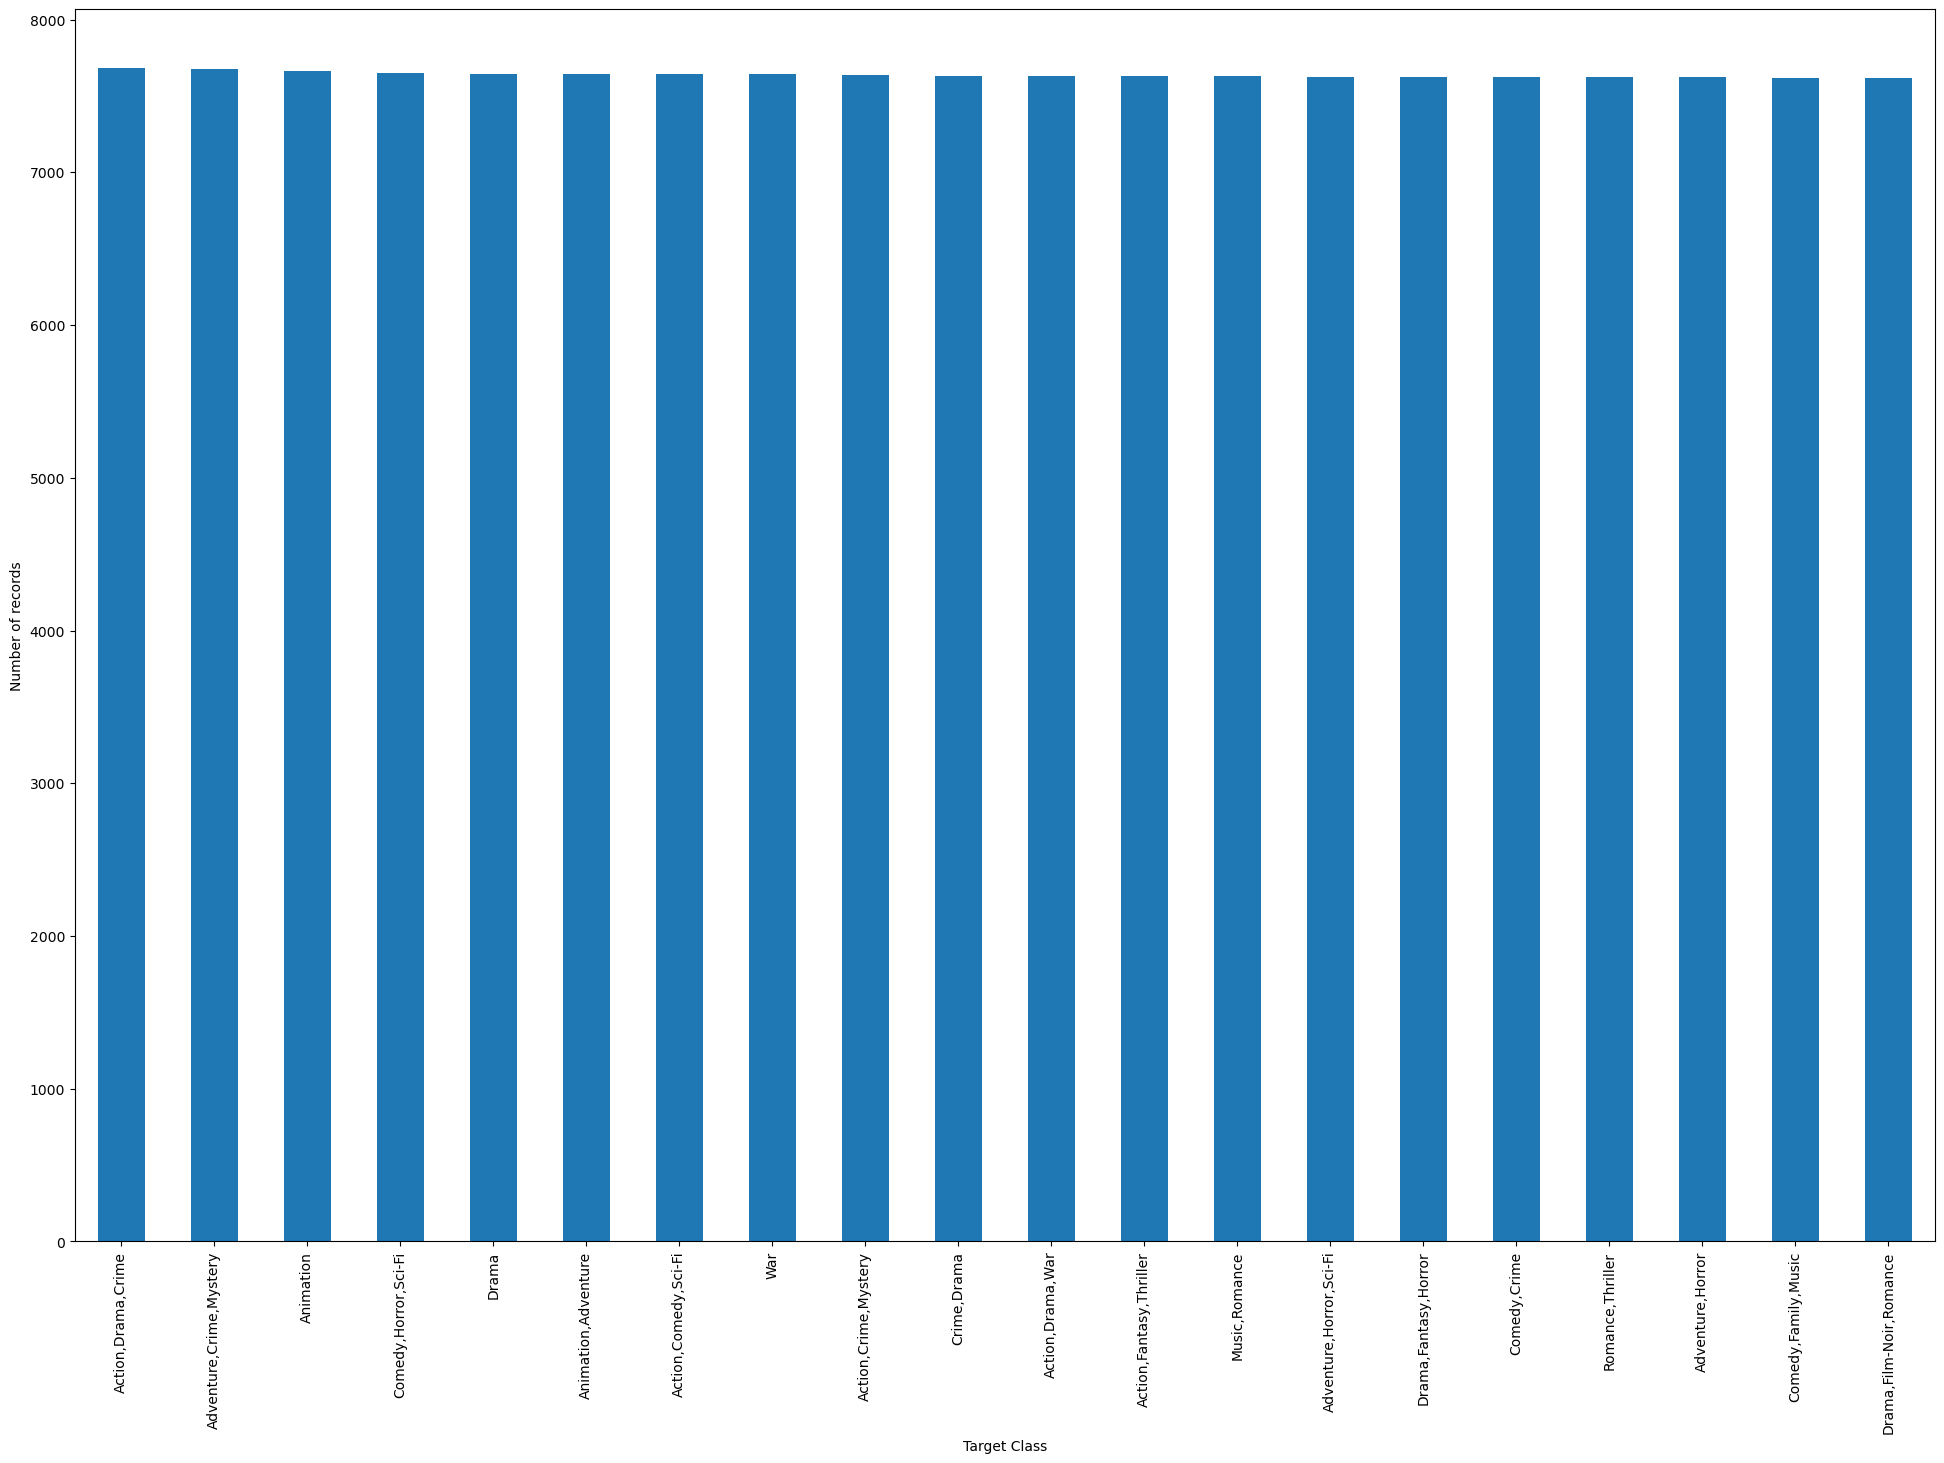

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(24, 16))

count = y_train.value_counts().head(20)  # Get top 20 values
count.plot.bar(ax=ax)
ax.set_ylabel('Number of records')
ax.set_xlabel('Target Class')
plt.savefig('Images/Imbalance_data.png', bbox_inches='tight')
plt.show()

In [ ]:
# X = df['corpus']
# y = df['new_genre']

# tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 4), max_df=0.8, min_df=5)

# X_tfidf = tfidf.fit_transform(X)
# ros = RandomOverSampler(sampling_strategy='minority')
# X_resampled, y_resampled = ros.fit_resample(X_tfidf, y)

# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, hamming_loss

# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots(figsize=(24, 16))

# count = y_train.value_counts().head(20)  # Get top 20 values
# count.plot.bar(ax=ax)
# ax.set_ylabel('Number of records')
# ax.set_xlabel('Target Class')
# plt.savefig('Images/Imbalance_data.png', bbox_inches='tight')
# plt.show()

## Resampled using RandomOverSampling (all)

In [16]:
models = {
    "Single Vector Machine": LinearSVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
}

for model_name, model in models.items():
    # Fit the model on the resampled data
    model.fit(X_train, y_train)

    # Make predictions on test set
    y_pred = model.predict(X_test)

    print(f"Model: {model_name}")
    print("Accuracy: {:.3f}".format(accuracy_score(y_test, y_pred)))
    print("Hamming Loss: {:.3f}".format(hamming_loss(y_test, y_pred)))
    print("F1-Score: {:.3f}".format(f1_score(y_test, y_pred, average='macro')))
    print("Precision: {:.3f}".format(precision_score(y_test, y_pred, average='macro', zero_division=1)))
    print("Recall: {:.3f}".format(recall_score(y_test, y_pred, average='macro', zero_division=1)))
    # print("Confusion Matrix:")
    # print(confusion_matrix(y_test, y_pred))
    print()
    # # Print classification report and confusion matrix
    # print(f"Model: {model_name}")
    # print("Accuracy: {:.3f}".format(accuracy_score(y_test, y_pred)))
    # print("Hamming Loss: {:.3f}".format(hamming_loss(y_test, y_pred)))
    # print(classification_report(y_test, y_pred, zero_division=1))
    # print(confusion_matrix(y_test, y_pred))

Model: Single Vector Machine
Accuracy: 0.782
Hamming Loss: 0.218
F1-Score: 0.760
Precision: 0.880
Recall: 0.708

Model: Decision Tree
Accuracy: 0.765
Hamming Loss: 0.235
F1-Score: 0.719
Precision: 0.798
Recall: 0.702

Model: Random Forest
Accuracy: 0.782
Hamming Loss: 0.218
F1-Score: 0.782
Precision: 0.949
Recall: 0.703



## Testing the model